In [37]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Obtenir la structure de bandes de phonons
with MPRester("CEEbAW2taTmupi7NIXR") as m:
    band = m.get_phonon_bandstructure_by_material_id("mp-31451")

# Plot de la dispersion des phonons et zone de Brillouin

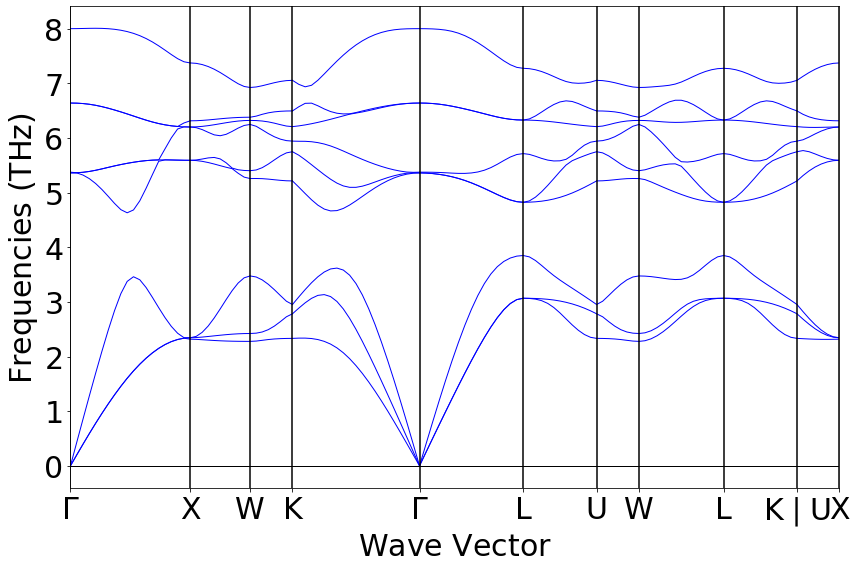

In [39]:
plot = PhononBSPlotter(band)

#Plot de la dispersion
plot.bs_plot_data()
plot.show()

Pourquoi a-t-on besoin de connaitre la relation de dispersion pour calculer $v_s$ ?

Lorsque l'on trace la relation de dispersion pour un matériau, on obtient une courbe représentant la fréquence angulaire en fonction du vecteur d'onde. Si cette courbe est suffisamment linéaire, on peut approximer la vitesse du son dans le matériau comme étant la pente de cette courbe.

Attention, cette approximation est uniquement valable pour des valeurs de vecteur d'onde suffisamment petites. C'est-à-dire pour des valeurs de $\lambda >> a $. Avec $\lambda$ : la longueur d'onde et a : la distance moyenne interatomique.

Nous verrons en détail ce calcul dans la section ci-dessous.

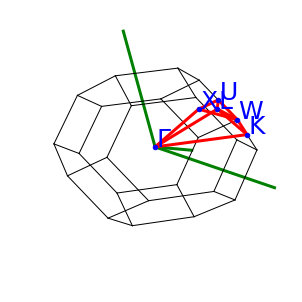

In [40]:
#Plot de la zone de Brillouin
plot.plot_brillouin()

# Calcul de la vitesse du son dans la zone de Brillouin

Comme expliqué précédemment, 

On utilise la relation de dispersion acoustique (l'approximation de Debye) : $\omega = v_s \lvert \mathbf{q} \rvert$. Avec $\lvert \mathbf{q} \rvert$, la norme du vecteur d'onde ( ! exprimée en $Å = 10^{-10} m $) et $\omega$, la fréquence ( ! ici exprimée en THz = $10^{12}$ Hz). Il ne faut donc pas oublier de convertir ces valeurs pour obtenir $v_s$ en m/s.

Pour le calcul de $v_s$, il faudra donc prendre la pente des différentes branches choisies (pour mieux visualiser : voir le plot en dessous du calcul).

In [41]:
#Calcul de la vitesse du son dans les 3 directions différentes : 

#Données
data = plot.bs_plot_data()
distances = data.get("distances")
frequency = data.get("frequency")

#Pentes
slope1 = np.abs((frequency[0][1][1] - frequency[0][1][0]) / (distances[0][1]-distances[0][0]))
slope2 = np.abs((frequency[3][0][-1] - frequency[3][0][-2]) / (distances[3][-1]-distances[3][-2]))
slope3 = np.abs((frequency[4][2][1] - frequency[4][2][0]) / (distances[4][1]-distances[4][0]))

#Unités
fact_conversion = 1e2

#Affichage

print("La vitesse du son dans la direction Γ-X vaut " + str(slope1*fact_conversion) + " m/s \n")
print("La vitesse du son dans la direction K-Γ vaut " + str(slope2*fact_conversion) + " m/s \n")
print("La vitesse du son dans la direction Γ-L vaut " + str(slope3*fact_conversion) + " m/s \n")

La vitesse du son dans la direction Γ-X vaut 371.63825970108945 m/s 

La vitesse du son dans la direction K-Γ vaut 376.7564203929896 m/s 

La vitesse du son dans la direction Γ-L vaut 719.260471663419 m/s 



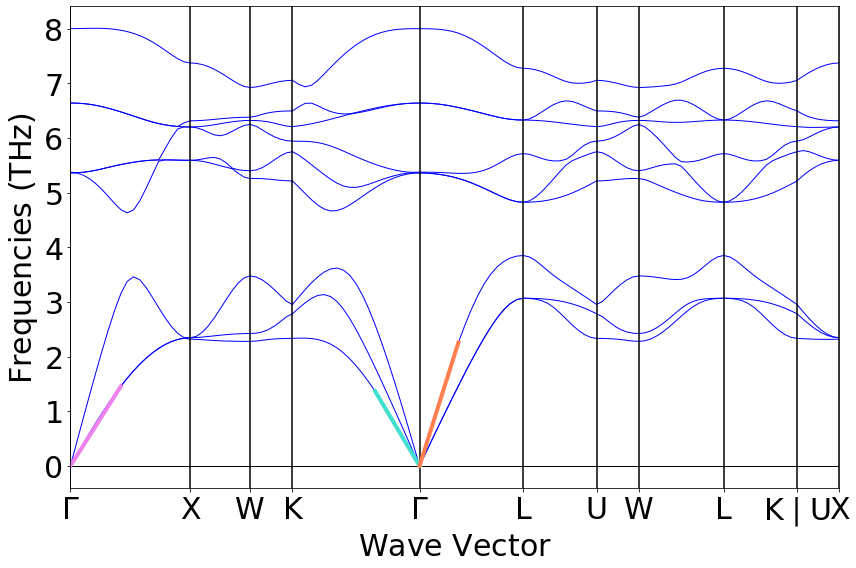

In [42]:
#Visualisation des directions choisies

plot.get_plot()
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='violet', lw = 4)
plt.plot([distances[3][13],distances[3][13]+distances[3][-1]-distances[3][13]],[frequency[3][0][13],frequency[3][0][13]+frequency[3][0][-1]-frequency[3][0][13]], color='turquoise', lw = 4)
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='coral', lw = 4)

Légende: 

Vitesse du son dans direction Γ-X en rose, dans direction K-Γ en turquoise et dans direction Γ-L en orange.